# 수치 미분

- 경사법에서는 기울기 값을 기준으로 나아갈 방향을 정한다. 
- 함수를 미분하는 계산을 구현해보자

In [1]:
# 나쁜 구현의 예
def numerical_diff(f,x):
    h = 1e-50 # 매우 작은 수, 소수점 아래 0이 50개
    return (f(x+h) - f(x))/h

- 위 함수에서 개선해야 할 점 
  - 1) 1e-50은 반올림 오차 문제를 일으킨다. 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 하는 것이다. 예를 들면

In [24]:
import numpy as np
np.float32(1e-50)

0.0

- 미세한 값 h를 10**-4 정도로 이용해보자. 10**-4 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다. 
- 두 번째 개선 : 함수 f의 차분(임의의 두 점에서의 함수 값들의 차이)과 관련한 것이다.
  - 위 함수에서는 x+h와 x사이의 함수f의 차분을 계산하고 있지만, 애당초 이 계산에는 오차가 있다는 사실에 주의해야 한다.
  - 진정한 미분은 x 위치의 함수의 기울기(이를 접선이라고 함)에 해당하지만, 이번 구현에서의 미분은 (x+h)와 x사이의 기울기에 해당한다
  - 그래서 진정한 미분(진정한 접선)과 이번 구현의 값은 엄밀히는 일치하지 않는다. 이 차이는 h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계이다.

- 수치 미분에는 오차가 포함된다.
  - 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수f의 차분을 계산하는 방법을 쓰기도 한다.
  - 해당 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심 차분 혹은 중앙 차분이라고 한다. (x와 x+h의 차분은 전방 차분이라고 한다.)
- 두 개선점을 적용해 수치 미분을 구현해보자

In [3]:
def numerical_diff(f,x):
    h = 1e-4 #0.0001 # 개선 1
    return (f(x+h) - f(x-h)) / (2*h) # 2h = x+h-(x-h) =2h # 개선 2

---

- 앞 절의 수치 미분을 사용하여 간단한 함수를 미분해보자

In [4]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

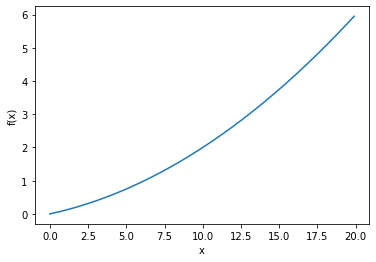

In [5]:
import matplotlib.pyplot as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

- 이제 x는 5일 때와 10일 때의 함수의 미분을 계산해보자

In [6]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))
# 함수의 기울기에 해당한다.

0.1999999999990898
0.2999999999986347


---

0.1999999999990898
0.2999999999986347


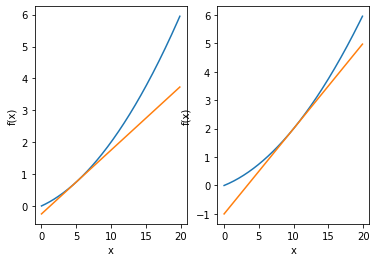

In [7]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     

fig, (ax1,ax2)= plt.subplots(1,2)    

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)

ax1.plot(x, y)
ax1.plot(x, y2)
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')

tf = tangent_line(function_1, 10)
y2 = tf(x)

ax2.plot(x, y)
ax2.plot(x, y2)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')

plt.show()

---

- 편미분

In [8]:
def function_2(x):
    return x[0]**2+x[1]**2
    # 또는 return np.sum(x**2)

- 앞의 예와 달리 변수가 2개이다
  - 미분해보자
    - 변수가 2개다
    - 어느 변수에 대한 미분이냐가 중요하다
    - 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다.
    - $\frac{\partial f}{\partial x_0}$
    - $\frac{\partial f}{\partial x_1}$

- x_0 = 3, x_1 = 4 일 때, x_0에 대한 편미분을 구해보자

In [9]:
def function_tmp1(x0):
    return x0*x0 + 4**2

numerical_diff(function_tmp1,3)

6.00000000000378

In [10]:
def function_tmp2(x1):
    return 3**2 + x1*x1

numerical_diff(function_tmp2,4)

7.999999999999119

- 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현하여 풀었다. 
  - 예를 들어 문제 1에서는 x1=4로 고정된 새로운 함수를 정의하고 변수가 x0 하나뿐인 함수에 대해 이전에 정의해두었던 수치 미분 함수를 적용하였따. 
  - 이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다.
  - 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다. 
  - 앞의 예에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의했다.
  - 그리고 그 새로이 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구한 것이다.

---

- 기울기
  - 위에선 x0와 x1에 대한 편미분 각각을 구했다. 이번엔 편미분을 묶어서
  - ($\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$)
  - 을 계산해본다고 해보자. 이때 ($\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$)처럼 모든 변수의 편미분을 벡터로 정리한 것을 `기울기`라고 한다.
  - 구현해보자

In [11]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

- 좀 복잡해보이지만 동작 방식은 변수가 하나일 때의 수치 미분과 거의 동일하다

In [12]:
numerical_gradient(function_2,np.array([3.0,4.0]))

array([6., 8.])

In [13]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [14]:
numerical_gradient(function_2,np.array([3.0,0.0]))

array([6., 0.])

- 아직은 잘 모르겠지만 numerical_gradient함수에 인수로 넘파이 배열 입력해줄 때, 소수형태가 아닌 int형태로 입력해주면 값이 현저히 달라짐
- 그런데 이 기울기가 의미하는 건 뭘까, 그림으로 그려서 이해해보자
  - 기울기의 결과에 마이너스를 붙인 벡터를 그린것이다.

No handles with labels found to put in legend.


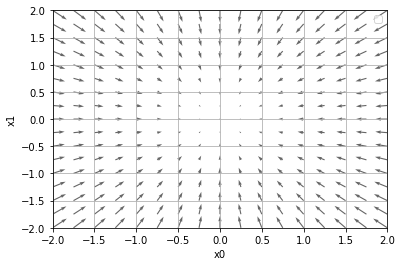

In [15]:
# hide
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

- 기울기 그림을 살펴보면 방향을 가진 벡터로 그려진다. 
- 기욹는 함수의 가장 낮은 장소(최솟값)를 가리키는 것 같다. 
- 또 가장 낮은 곳(최솟값)에서 멀어질수록 화살표의 크기가 커짐을 알 수 있다.
- 위 그림에서 기울기는 가장 낮은 장소를 가리킨다. 실제는 반드시 그렇다고는 할 수 없다.
- 사실 기울기는 각 지점에서 낮아지는 방향을 가리킨다. 
  - #### ***`더 정확히 말하자면 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다`***
  - (※ 매우중요)

---

- 경사법(경사 하강법)
  - 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다. 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 한다. 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 이런 상황에서 기울기를 잘 이용해 함수의 최소값(또는 가능한 한 작은 값)을 찾으려는 것이 경사법이다.
  - 여기에서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다.
    - 그렇지만 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.
  - 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다. 
  - 그래서 최솟값이 되는 장소를 찾는 문제, 아니면 가능한 한 작은 값이 되는 장소를 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 한다. 
  

- 경사법 : 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 줄이는 것이 경사법이다. 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망에서는 경사법을 많이 사용한다.

- 경사법을 수식으로 나타내보자
  - $x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}$
  - $x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}$
- $\eta$는 갱신하는 양이다. 신경망 학습에서는 학습률이라고 한다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.
- 위 식은 1회에 해당하는 갱신이고, 이 단계를 반복한다. 
- 위 단계를 반복하며 서서히 함수의 값을 줄이는 것이다.
- 또한 학습률은 0.01 혹은 0.001 등 미리 특정한 값으로 정해두어야 하는데, 일반적으로 이 값이 너무 크거나 작으면 좋은 장소를 찾아갈 수 없다. 신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.

---

- 경사 하강법을 구현해보자

In [16]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x-= lr*grad
    return x

- f = 최적화하려는 함수
- init_x = 초깃값
- lr = 학습률
- step_num = 경사법에 따른 반복횟수

In [17]:
def function_2(x):
    return x[0]**2 +x[1]**2

init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr =0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

- 초깃값을 (-3.0,4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작한다. 
- 최종 결과는 거의 (0,0)에 가깝다. 실제로 진정한 최솟값을 (0,0)이므로 경사법으로 거의 정확한 결과를 얻은 것이다.

---

- 학습률을 달리하여 해보자

In [18]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

- 너무 크게 했더니 큰 값으로 발산해버렸다

In [19]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

- 너무 작게 했더니 거의 갱신하지 않고 끝났다

$\to$ 따라서 학습률을 적절히 설정하는 일은 중요하다

- 학습률과 같은 매개 변수를 하이퍼 파라미터라고 한다. 이는 가중치와 편향같은 신경망의 매개변수와는 성질이 다른 매개변수이다. 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 자동으로 획득되는 매개변수인 반면, 학습률 같은 하이퍼 파라미터는 사람이 직접 설정해야 하는 매개변수인 것이다. 일반적으로는 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

---

- 신경망에서의 기울기
  - 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다.

In [20]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

- simpleNet 클래스는 형상이 2x3인 가중치 매개변수 하나를 인스턴스 변수로 갖는다.
- 메서드는 2개인데, 하나는 예측을 수행하는 predict이고 다른 하나는 손실 함수의 값을 구하는 loss이다. 여기서 x는 입력데이터, t는 정답 레이블이다.

In [21]:
net = simpleNet()
# 가중치 매개변수
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
# 최댓값의 인덱스
print(np.argmax(p))

# 정답 레이블
t = np.array([0, 0, 1])
net.loss(x,t)

[[ 0.48129772  0.4062162  -0.31963495]
 [ 0.11586695  1.06101565 -0.79045592]]
[ 0.39305889  1.19864381 -0.90319129]
1


2.5523095142122116

- 이어서 기울기를 구해보자

In [22]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.17086397  0.38239445 -0.55325842]
 [ 0.25629596  0.57359168 -0.82988764]]


- 람다를 사용해 아래와 같이 구현할 수 있겠다

In [23]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.17086397  0.38239445 -0.55325842]
 [ 0.25629596  0.57359168 -0.82988764]]


- 신경망의 기울기를 구한 다음에는 경사법에 따라 가중치 매개변수를 갱신하기만 하면 된다. 다름 절에서는 2층 신경망을 대상으로 학습 과정 전체를 구현해보자
- 135p참고하기